# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
import pickle
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder


random.seed(42)
np.random.seed(42)

In [2]:
!pip install ydata-profiling

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответьте на вопрос: для чего фиксируем сиды в домашках?

**Сиды фиксируются для воспроизводимости результатов. Фиксация дает нам одинаковые случайные значения при перезапуске, что помогает при сравнении результатов при изменении алгоритма обучения модели и т.д.**

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
#df_train.to_csv('data.csv',index=False)
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
#конфигурация
pd.set_option('display.width', 200)
warnings.filterwarnings("ignore")

### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [5]:
#Отобразите 30 случайных строк тренировочного датасета.
print(df_train.sample(30) )

                                        name  year  selling_price  km_driven    fuel       seller_type transmission         owner     mileage   engine   max_power                  torque  seats
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000  Petrol        Individual       Manual   First Owner  23.01 kmpl   999 CC      67 bhp           91Nm@ 4250rpm    5.0
2943                      Maruti Wagon R LXI  2013         225000      58343  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   998 CC   67.05 bhp           90Nm@ 3500rpm    5.0
2024                    Hyundai i20 Asta 1.2  2013         360000      30000  Petrol        Individual       Manual   First Owner   18.5 kmpl  1197 CC   82.85 bhp        113.7Nm@ 4000rpm    5.0
263                     Hyundai i20 1.2 Asta  2010         300000      70000  Petrol        Individual       Manual   First Owner   17.0 kmpl  1197 CC      80 bhp   11.4 kgm at 4,000 rpm    5.0
4586        Skoda Octavia L an

In [6]:
#Отобразите первые 5 и последние 5 объектов тестового датасета
print('Первые 5 объектов:')
print(df_test.head(5),'\n')
print('Последние 5 объектов')
print(df_test.tail(5))

Первые 5 объектов:
                                     name  year  selling_price  km_driven    fuel seller_type transmission         owner    mileage   engine  max_power                   torque  seats
0                  Mahindra Xylo E4 BS IV  2010         229999     168000  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC    112 bhp  260 Nm at 1800-2200 rpm    7.0
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC  108.5 bhp      260Nm@ 1500-2750rpm    5.0
2                    Honda Civic 1.8 S AT  2007         175000     218463  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC    130 bhp           172Nm@ 4300rpm    5.0
3                    Honda City i DTEC VX  2015         635000     173000  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   98.6 bhp           200Nm@ 1750rpm    5.0
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         13000

In [7]:
#Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
print("Пропуски в тренировочном наборе:")
misses_train=df_train.isnull().sum()
print(misses_train[misses_train>0])

print("Пропуски в тестовом наборе:")
misses_test=df_test.isnull().sum()
print(misses_test[misses_test>0])

Пропуски в тренировочном наборе:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64
Пропуски в тестовом наборе:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


In [8]:
#Посмотрите, есть ли в данных явные дубликаты
print(f"Явные дубликаты в обучающей выборке: {df_train.duplicated().sum()}")
print(f"Явные дубликаты в тестовой выборке: {df_test.duplicated().sum()}")

Явные дубликаты в обучающей выборке: 985
Явные дубликаты в тестовой выборке: 62


 Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

**Ответ: Можно сделать выводы об общей структуре датасета, типах признаков объектов. Нельзя сделать выводы о распределениях и корреляции признаков**

 Достаточно ли метода duplicated для анализа дубликатов? Почему?

**Ответ: Метода duplicated не полностью достаточно для анализа дубликатов, так как по умолчанию идет проверка по всем столбцам, а в датасете могут быть частичные дубликаты, которые также требуют анализа.**

In [9]:
#Постройте дашборд, используя ydata-profilling
from ydata_profiling import ProfileReport
ProfileReport(df_train, title="Дэшборд")

ModuleNotFoundError: No module named 'ipywidgets'

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете по *тренировочному* набору данных и им же заполняете *тестовый*.

In [10]:
# your code here
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
print("Числовые столбцы:", numeric_columns)

# Найдем числовые столбцы с пропусками
numeric_with_missing = [col for col in numeric_columns if df_train[col].isnull().any()]
print("Числовые столбцы с пропусками:", numeric_with_missing)

# Вычислим медианы
medians = df_train[numeric_with_missing].median()

# Заполняим пропуски
df_train[numeric_with_missing] = df_train[numeric_with_missing].fillna(medians)


df_test[numeric_with_missing] = df_test[numeric_with_missing].fillna(medians)

Числовые столбцы: ['year', 'selling_price', 'km_driven', 'seats']
Числовые столбцы с пропусками: ['seats']


**Комментарий:** При попытке заполнить все пропуски в столбцах медианными значениями, выдало ошибку, так как некоторые столбцы не числовые, поэтому на текущем шаге были отобраны числовые столбцы и заполнены медианами.

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
df_train_duplicated_check=df_train.drop('selling_price',axis=1)
df_train_duplicated_check.duplicated().sum()

np.int64(1159)

In [12]:
# Отобразите такие объекты (0.15 балла)
df_train_duplicated_check[df_train_duplicated_check.duplicated()>0]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [13]:
# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
df_train = df_train.drop_duplicates(subset=df_train_duplicated_check,keep='first')

In [14]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)
df_train = df_train.reset_index(drop=True)

In [15]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [16]:
# Уберите единицы измерения для признаков mileage, engine, max_power.

#Очистка для обучающей выборки
df_train['mileage'] = df_train['mileage'].str.extract('(\d+\.?\d*)')
df_train['engine'] = df_train['engine'].str.extract('(\d+\.?\d*)')
df_train['max_power'] = df_train['max_power'].str.extract('(\d+\.?\d*)')

#Очистка для тестовой выборки
df_test['mileage'] = df_test['mileage'].str.extract('(\d+\.?\d*)')
df_test['engine'] = df_test['engine'].str.extract('(\d+\.?\d*)')
df_test['max_power'] = df_test['max_power'].str.extract('(\d+\.?\d*)')

In [17]:
# Приведите тип данных к float
df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].astype(float)
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].astype(float)


In [18]:
#Удалите столбец torque
df_train=df_train.drop('torque',axis=1)
df_test=df_test.drop('torque',axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

Примечание, так как столбцы у нас теперь числовые, необходимо сначала и для них заполнить пропуски медианными значениями

In [19]:
# your code here
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
print("Числовые столбцы:", numeric_columns)

# Найдем числовые столбцы с пропусками
numeric_with_missing = [col for col in numeric_columns if df_train[col].isnull().any()]
print("Числовые столбцы с пропусками:", numeric_with_missing)

# Вычисляем медианы по тренировочному набору для числовых столбцов с пропусками
medians = df_train[numeric_with_missing].median()

# Заполняем пропуски в тренировочном наборе
df_train[numeric_with_missing] = df_train[numeric_with_missing].fillna(medians)

# Заполняем пропуски в тестовом наборе (используем медианы с тренировочного набора)
df_test[numeric_with_missing] = df_test[numeric_with_missing].fillna(medians)

Числовые столбцы: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
Числовые столбцы с пропусками: ['mileage', 'engine', 'max_power']


In [20]:
# your code here
df_train[['seats', 'engine']] = df_train[['seats', 'engine']].astype(int)
df_test[['seats', 'engine']] = df_test[['seats', 'engine']].astype(int)

In [21]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [22]:
print("Статистики по числовым признакам (train):")
print(df_train.describe())

print("\nСтатистики по числовым признакам (test):")
print(df_test.describe())

Статистики по числовым признакам (train):
              year  selling_price     km_driven      mileage       engine    max_power        seats
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000  5840.000000  5840.000000
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973    87.906371     5.426712
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834    31.640418     0.982344
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000     0.000000     2.000000
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000    68.000000     5.000000
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000    81.860000     5.000000
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000    99.000000     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   400.000000    14.000000

Статистики по числовым признакам (test):
              ye

In [23]:
print("\nСтатистики по категориальным признакам (train):")
print(df_train.describe(include=object))

print("\nСтатистики по категориальным признакам (test):")
print(df_test.describe(include=object))


Статистики по категориальным признакам (train):
                          name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

Статистики по категориальным признакам (test):
                       name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623


In [24]:
assert df_train.shape == (5840, 12)

Выводы:

1. Исходя из максимального года выпуска автомобиля можно сделать вывод, что датасет был собран в 2020 году и уже может быть не таким актуальным для построениия модели.

2. в датасете присутствуют очень дорогие автомобили, на которые необходимо обратить внимание на предмет проверки выброс ли это

3. в датасете также присутствуют автомобили с чрезвычайно большим пробегом, на что также стоит обратить внимание

4. В наименовании автомобилей есть много уникальных значений, что может негативно сказаться при конвертации в числовой признак.

5. Данные между трейном и тестом не имеют сильных расхождений, что положительно скажется на обучении и валидации модели

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 1000x500 with 0 Axes>

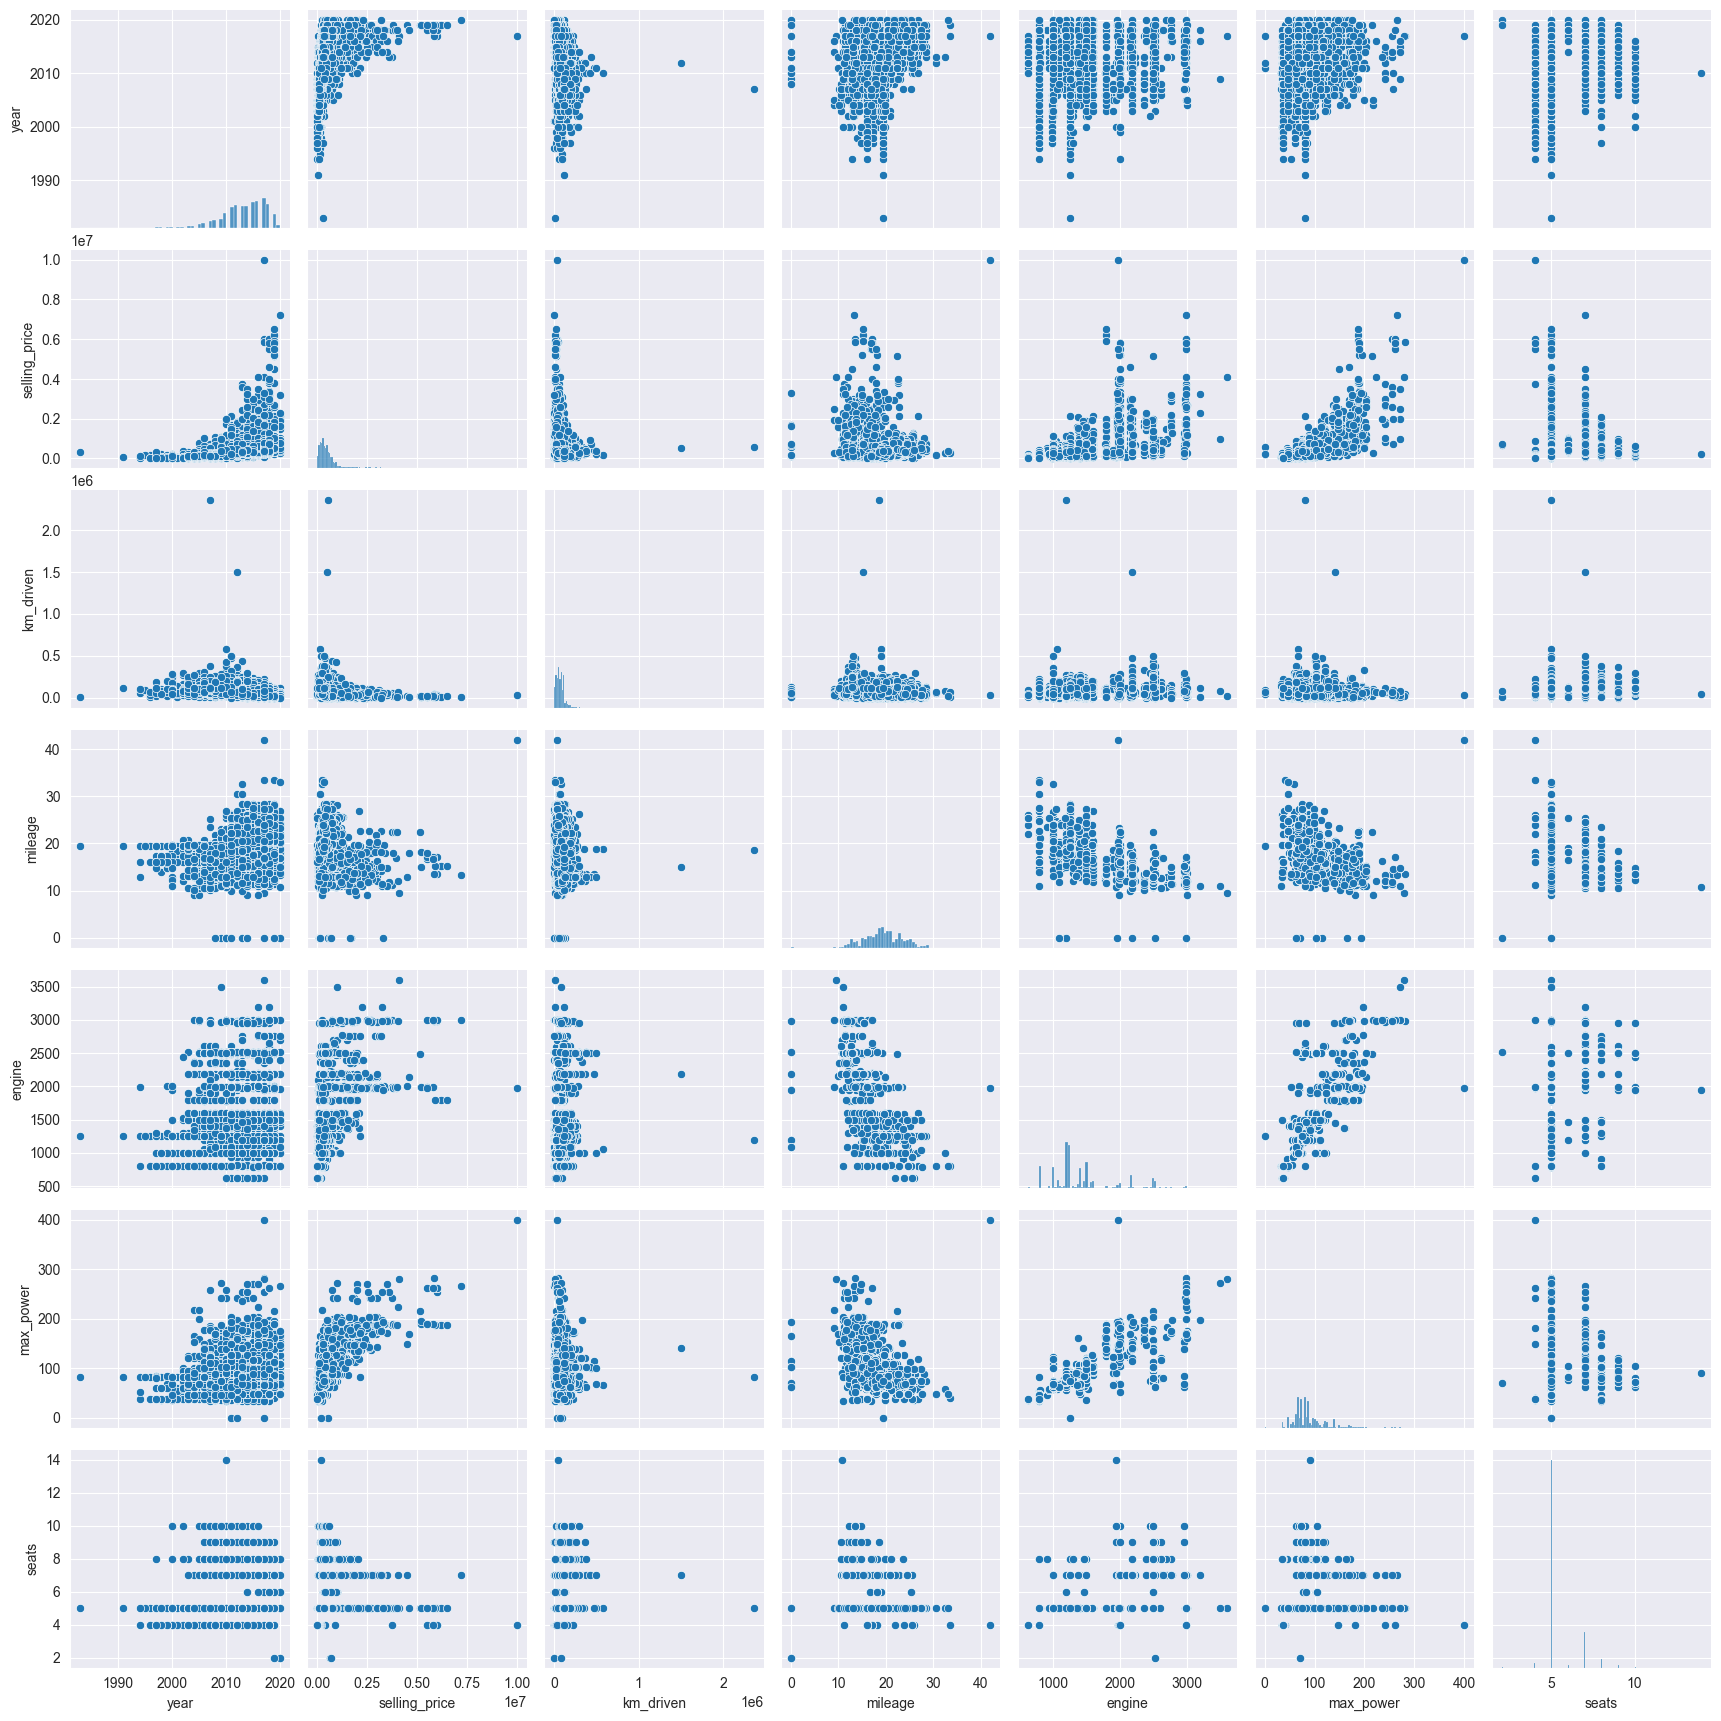

In [25]:
# Воспользуйтесь pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train
#sns.pairplot(data=df_train)
plt.figure(figsize=(10, 5))
sns.pairplot(data=df_train)
plt.show()

По полученному графику ответьте на вопросы:

Можно ли предположить на основе распределений связь признаков с целевой переменной?

**Ответ:** Да, на основе графика можно сделать предположения о корреляции признаков с целевой переменной(например год выпуска автомобиля имеют сильную положительную корреляцию с ценой, а пробег наоборот)

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

**Ответ:** Да, можно. Например, engine и max_power имеют положительную корреляцию

<Figure size 1000x500 with 0 Axes>

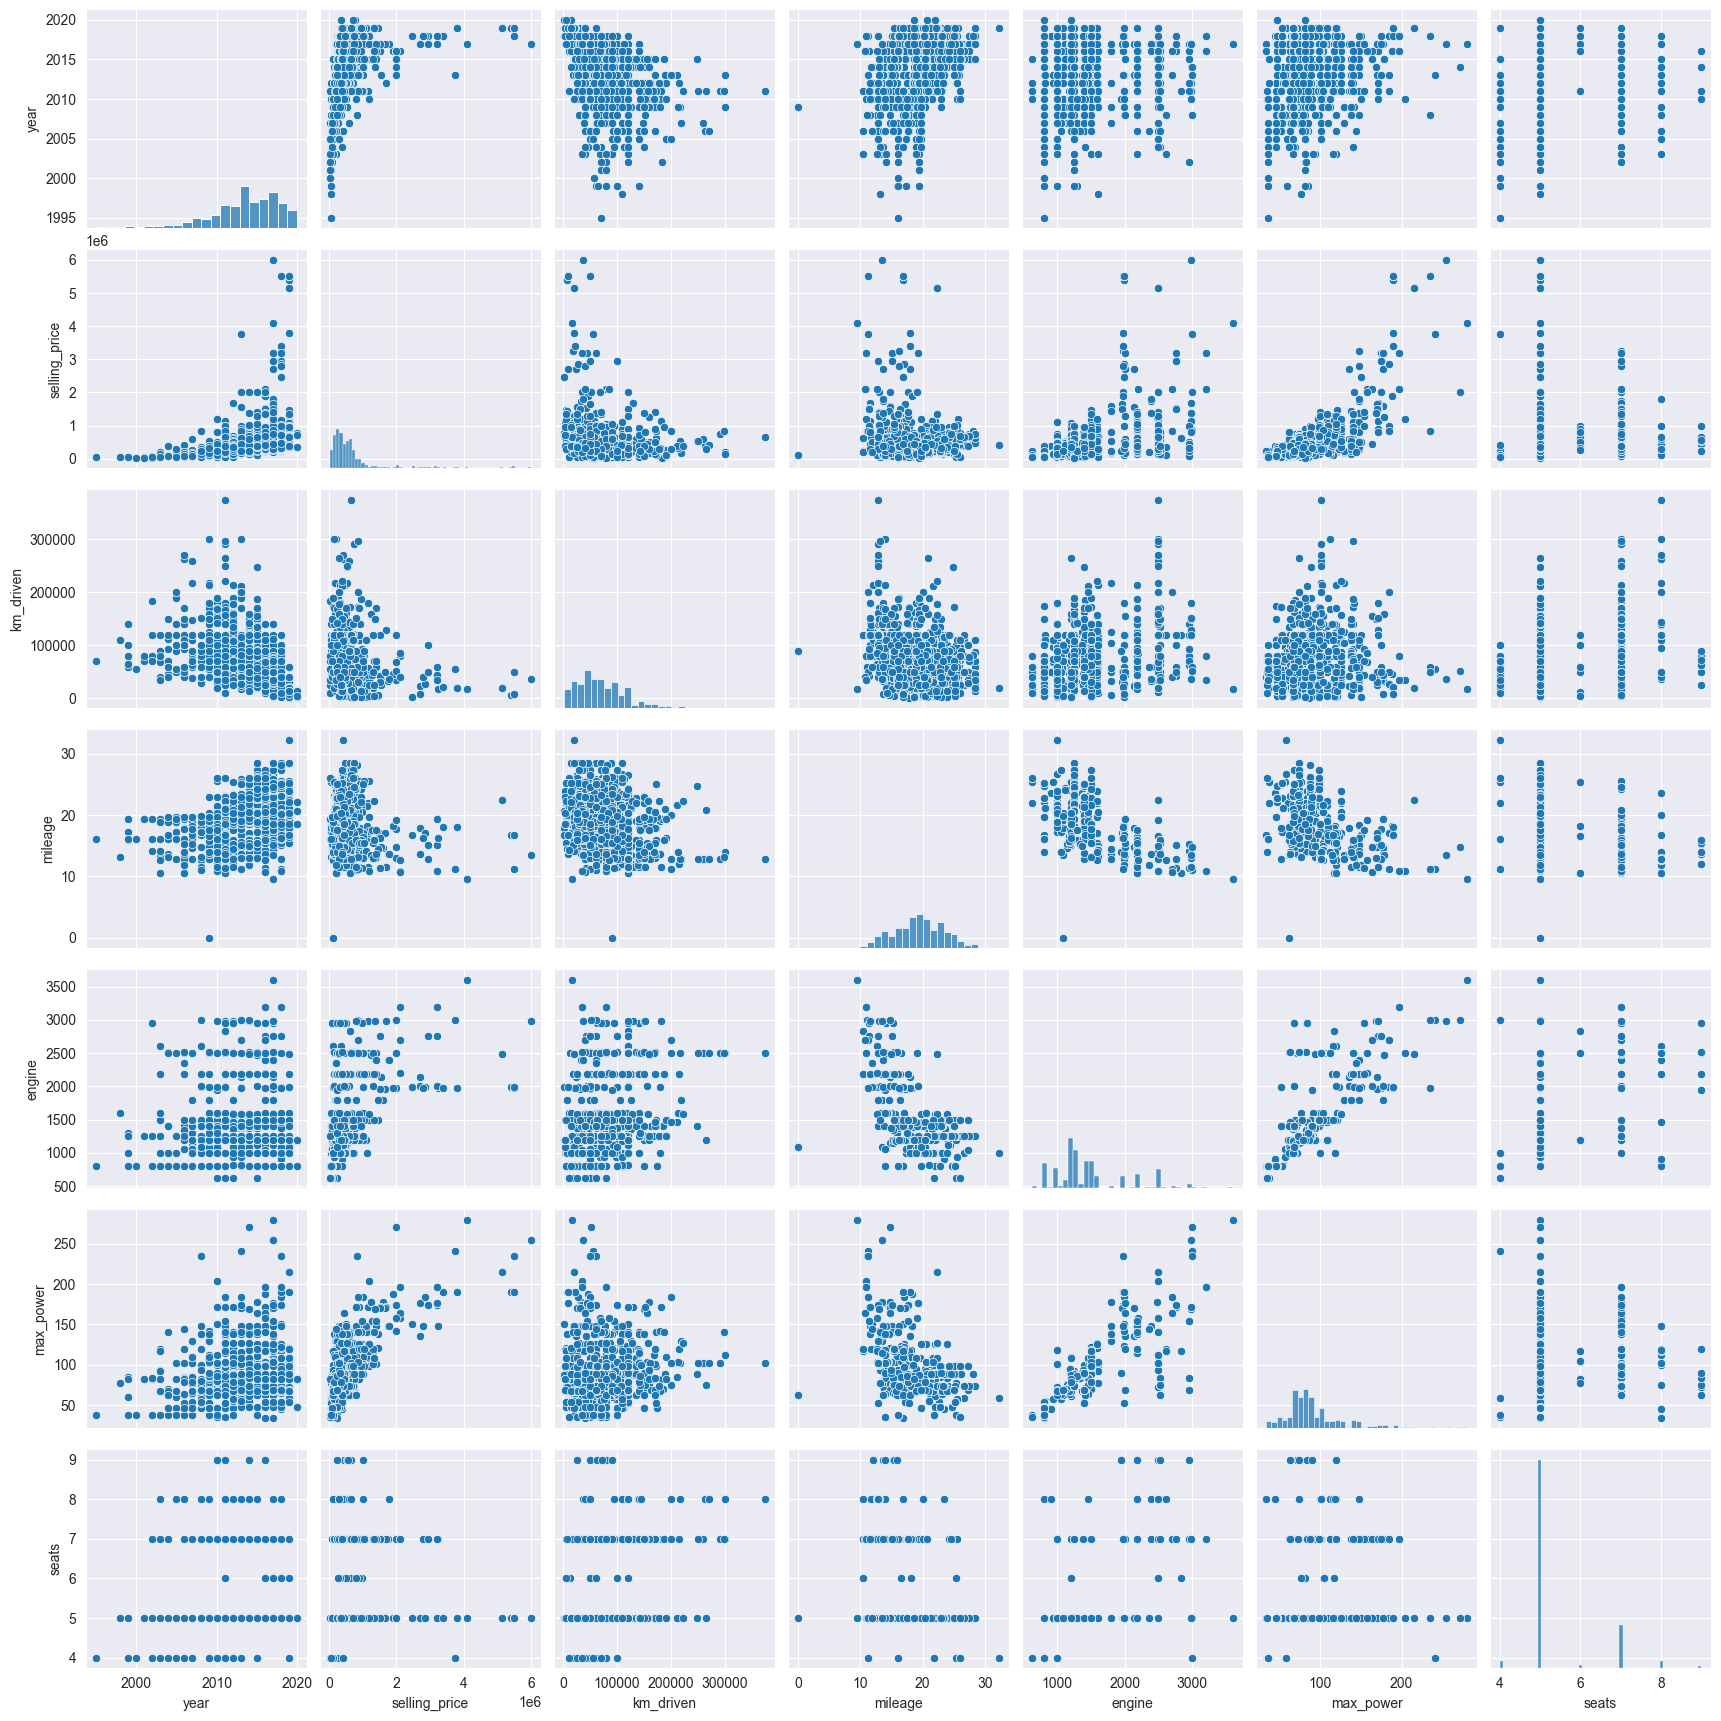

In [26]:
plt.figure(figsize=(10, 5))
sns.pairplot(data=df_test)
plt.show()

Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

**Ответ:** Да, совокопности оказались похожими, дисперсии числовых признаков на тесте и трейне сопоставимы

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


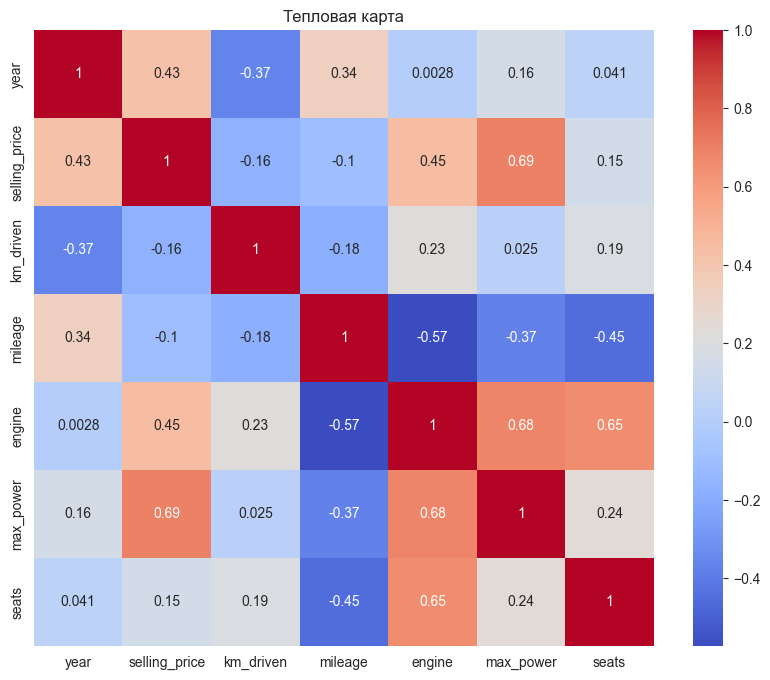

In [27]:
# your code here
correlation_matrix = df_train.corr(numeric_only=True)

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True)
plt.title('Тепловая карта')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Какие 2 признака наименее скоррелированы между собой?

**Ответ:** Наименее скоррелированы между собой признаки: year и engine(0.0028).

Между какими наблюдается довольно сильная положительная линейная зависимость?

**Ответ:** довольно сильная положительная корреляция между year и selling price, а сильная между maxpower и selling price.

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответ:** Да, это можно утверждать, так как между данными признаками есть достаточно сильная отрицательная корелляция.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

Считаю, что точно не хватает графика с распределением целевой переменной. Построение данного графика помогло понять, что распределение целевой переменной скошено вправо

<Axes: xlabel='selling_price', ylabel='Count'>

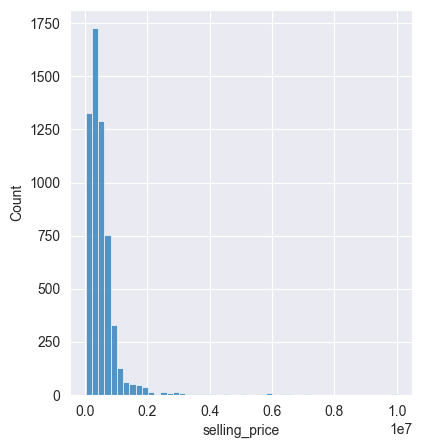

In [28]:
# your code here

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train['selling_price'], bins=50)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [29]:
#столбцы, которые необходимо оставить
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

#создадим копии df
df_train_numeric=df_train[numeric_columns].copy()
df_test_numeric=df_test[numeric_columns].copy()

y_train = df_train['selling_price'].copy()
X_train = df_train_numeric

In [30]:
# опишите выбранные вещественные признаки

1. year - год изготовления автомобиля
2. km_driven - пробег автомобиля
3. mileage - расход топлива
4. engine - объем двигателя
5. max_power - количество лошадиных сил
6. seats - количество мест в автомобиле

In [31]:
y_test = df_test['selling_price'].copy()
X_test = df_test_numeric

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [32]:


# your code here

lr=LinearRegression()
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"Train R²: {train_r2:.3f}, Train MSE: {train_mse:.0f}")
print(f"Test R²: {test_r2:.3f}, Test MSE: {test_mse:.0f}")

Train R²: 0.592, Train MSE: 116874153930
Test R²: 0.594, Test MSE: 233298779730


Сделайте выводы по значениям метрик качества.

**Выводы:** по R2 можно сказать, что модель неплохо предсказывает целевую переменную и нет сильного расхождения между трейном и тестом.

по MSE трудно оценить качество модели, так как целевая переменная имеет достаточно большую дисперсию. Однако можно заметить, что на тесте MSE почти в 2 раза больше, что может указывать на наличие выбросов или аномальных значений на тесте.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [33]:


# your code here
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_lr=LinearRegression()
scaled_lr.fit(X_train_scaled,y_train)

y_train_pred_scaled = scaled_lr.predict(X_train_scaled)
y_test_pred_scaled = scaled_lr.predict(X_test_scaled)

train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)
train_mse_scaled = MSE(y_train, y_train_pred_scaled)
test_mse_scaled = MSE(y_test, y_test_pred_scaled)

print(f"Train R2: {train_r2_scaled:.3f}, Train MSE: {train_mse_scaled:.0f}")
print(f"Test R2: {test_r2_scaled:.3f}, Test MSE: {test_mse_scaled:.0f}")

Train R2: 0.592, Train MSE: 116874153930
Test R2: 0.594, Test MSE: 233298779730


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [34]:
# your code here

col_weights=pd.DataFrame({ 'column':numeric_columns,'weights':scaled_lr.coef_ }).sort_values(by='weights',key=abs,ascending=False)
col_weights

,column,weights
4,max_power,322807.353259
0,year,152772.570846
3,engine,61178.494337
1,km_driven,-44158.818520
2,mileage,28833.925778
5,seats,-23209.132486


Какой признак оказался наиболее информативным в предсказании цены?

**Ответ:** Наиболее информативным по модулю оказался признак **max_power**

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [35]:


# your code here
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
train_mse_lasso = MSE(y_train, y_train_pred_lasso)
test_mse_lasso = MSE(y_test, y_test_pred_lasso)

print(f"Train R2: {train_r2_lasso:.3f}, Train MSE: {train_mse_lasso:.0f}")
print(f"Test R2: {test_r2_lasso:.3f}, Test MSE: {test_mse_lasso:.0f}")

col_weights_lasso=pd.DataFrame({ 'column':numeric_columns,'weights':lasso.coef_ }).sort_values(by='weights',key=abs,ascending=False)
print(col_weights_lasso)

Train R2: 0.592, Train MSE: 116874153940
Test R2: 0.594, Test MSE: 233299450599
      column        weights
4  max_power  322808.236919
0       year  152772.390214
3     engine   61173.662409
1  km_driven  -44157.689858
2    mileage   28832.043396
5      seats  -23206.255649


Веса не занулились, так как каждый признак оказывает свое влияние на целевую переменную и с параметрами по умолчанию этого не достаточно, чтобы занулить какой-либо из них. Также веса большие и для их зануления потребуется большое значение у alpha(на 10000 занулился один признак, на 15000 два)

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [36]:

param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}

lasso_cv = GridSearchCV(Lasso(), param_grid_lasso, cv=10, scoring='r2', n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

# Количество моделей, обученных в GridSearchCV
print(f"Количество обученных моделей для Lasso: {len(param_grid_lasso['alpha']) * 10}")


print("Lasso лучшие параметры:", lasso_cv.best_params_)

best_lasso = lasso_cv.best_estimator_

lasso_best_coefficients = pd.DataFrame({
    'feature': numeric_columns,
    'coefficient': best_lasso.coef_
})

# Количество занулённых коэффициентов
num_zero_coef = (lasso_best_coefficients['coefficient'] == 0).sum()
print(f"Количество занулённых коэффициентов: {num_zero_coef}")
print(f"метрика R2 лучшей модели: {lasso_cv.best_score_}")



Количество обученных моделей для Lasso: 80
Lasso лучшие параметры: {'alpha': 10000}
Количество занулённых коэффициентов: 1
метрика R2 лучшей модели: 0.5727197315544514


In [37]:
# your code here

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [38]:
# your code here
param_grid_elastic = {
    'alpha': [0.001, 0.1, 1, 10, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_cv = GridSearchCV(ElasticNet(), param_grid_elastic, cv=10, scoring='r2', n_jobs=-1)
elastic_cv.fit(X_train_scaled, y_train)
best_elastic = elastic_cv.best_estimator_

# Количество моделей, обученных в GridSearchCV
print(f'Количество обученных моделей для ElasticNet: {len(param_grid_elastic['alpha']) * len(param_grid_elastic['l1_ratio']) * 10}')

print("ElasticNet лучшие гиперпараметры:", elastic_cv.best_params_)
print("ElasticNet метрика R2 лучше модели:", elastic_cv.best_score_)



SyntaxError: f-string: unmatched '[' (1498646970.py, line 12)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [84]:
df_train_cat = df_train.drop('name', axis=1)
df_test_cat = df_test.drop('name', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [85]:
#assert X_train_cat.shape == (5840, 10)

In [86]:
#X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [87]:
df_train_cat.describe(include=object)

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [88]:


categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

# Для тренировочного набора
X_train_cat = df_train_cat.drop('selling_price', axis=1)
y_train_cat = df_train_cat['selling_price'].copy()

# Для тестового набора
X_test_cat = df_test_cat.drop('selling_price', axis=1)
y_test_cat = df_test_cat['selling_price'].copy()

# Применяем OneHotEncoder с drop='first' чтобы избежать мультиколлинеарности
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train_cat[categorical_columns])
X_test_ohe = ohe.transform(X_test_cat[categorical_columns])

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [89]:
# your code here
scaler_ridge = StandardScaler()
X_train_ohe_scaled = scaler_ridge.fit_transform(X_train_ohe)
X_test_ohe_scaled = scaler_ridge.transform(X_test_ohe)

# Подбор параметра alpha для Ridge
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}

ridge_cv = GridSearchCV(Ridge(), param_grid_ridge, cv=10, scoring='r2', n_jobs=-1)
ridge_cv.fit(X_train_ohe_scaled, y_train_cat)
best_ridge = ridge_cv.best_estimator_
print("Ridge лучшие гиперпараметры:", ridge_cv.best_params_)
print("Ridge метрика R2 для лучше модели:", ridge_cv.best_score_)

Ridge лучшие гиперпараметры: {'alpha': 1000}
Ridge метрика R2 для лучше модели: 0.34592297769080493


Ответ: Нет, качество прогнозов улучшить не удалось, возможно добавление категориальных признаков сильно усложнило модель

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [92]:
def business_metric(y_true, y_pred):
    ape = np.abs((y_true - y_pred) / y_true)
    # Считаем долю прогнозов с ошибкой <= 10%
    percent = np.mean(ape <= 0.1)
    return 100*percent

#предсказания для моделей с GreedSearch
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)
y_test_pred_best_elastic = best_elastic.predict(X_test_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_ohe_scaled)
models = {
  'Linear Regression (числовые)': (y_test, y_test_pred_scaled),
  'Lasso (числовые)': (y_test, y_test_pred_best_lasso),
  'ElasticNet (числовые)': (y_test, y_test_pred_best_elastic),
  'Ridge (с категориальными)': (y_test_cat, y_test_pred_ridge)
}

print("Доля прогнозов с ошибкой меньше 10% по модулю):")
for model_name, (y_true, y_pred) in models.items():
    score = business_metric(y_true, y_pred)
    print(f"{model_name}: {score:.4f}")


Доля прогнозов с ошибкой меньше 10% по модулю):
Linear Regression (числовые): 22.7000
Lasso (числовые): 23.5000
ElasticNet (числовые): 24.1000
Ridge (с категориальными): 15.7000


**Ответ:** Лучше всего решает задачу бизнеса ElasticNet

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [99]:
numeric_columns =['year', 'km_driven', 'mileage', 'engine', 'max_power']
feature_info = {
    'feature_names': numeric_columns,  # список признаков
    'target_name': 'selling_price'
}

with open('feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)

In [97]:
numeric_columns

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats']

In [96]:
with open('best_Elastic_model.pkl', 'wb') as f:
    pickle.dump(elastic_cv.best_estimator_, f)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.